### Modelling Covid-19 Growth

The growth of a disease over time follows an exponential curve, as more individuals are infected, they pass the disease onto more people and so on. This is known as [exponential growth](https://en.wikipedia.org/wiki/Exponential_growth):\
$N(t)$ = Number of cases on a given day \
$E$ = Average number of people someone infected is exposed to to each day \
$p$ = Probability of each exposure leading to an infection.

$$N(t) = (1+Ep)^tN(0)$$

This model would just grow forever if the growth rate $1+Ep$ stayed the same, however a disease is limited by the population. However we can assume that the probabilty of exposure leading to an infection is limited by the proportion of people already infected, $p = 1 - \frac{N(t)}{Population Size}$

In [81]:
def expGrowth(E, p, N_0, days, Pop):
    cases = []
    cases.append(N_0)
    for day in range(1, days):
        p = p * (1 - cases[-1]/Pop)
        daily_cases = (1 + E * p)**day * N_0
        cases.append(daily_cases)
                 
    return np.cumsum(cases)

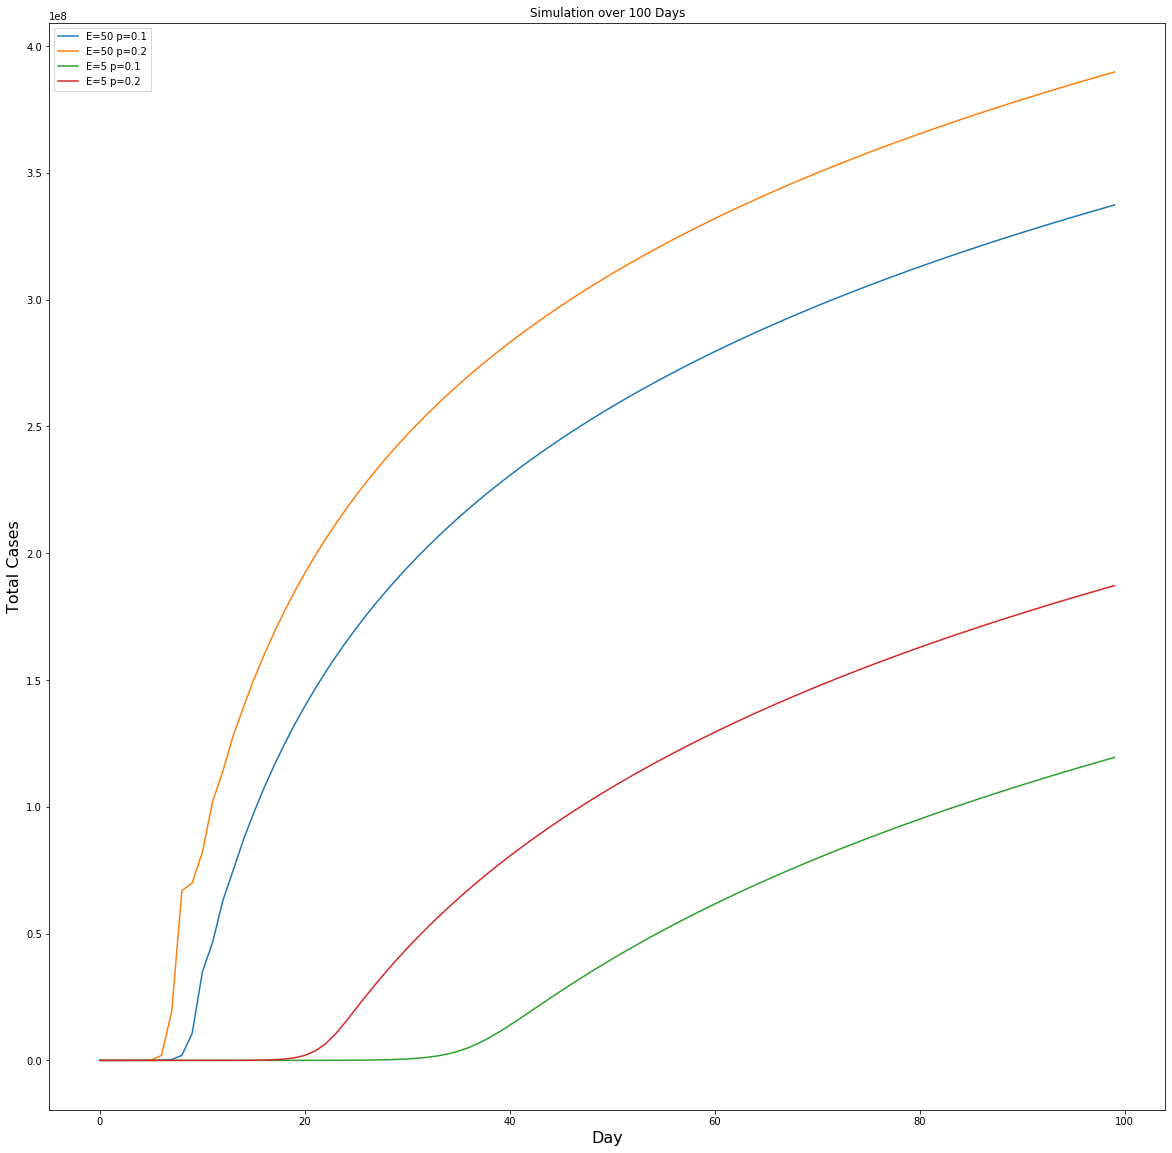

In [103]:
import numpy as np
import matplotlib.pyplot as plt

E = [50, 5]
p = [0.1, 0.2]
Pop = 100000000
days = 100
N_0 = 1

for i in range(0, 2):
    for j in range(0, 2):
        cases = expGrowth(E[i], p[j], N_0, days, Pop)
        plt.plot(range(0, days), cases, label = "E={} p={}".format(E[i], p[j]))
    
    
plt.xlabel("Day", fontsize=16)  
plt.ylabel("Total Cases", fontsize=16)
plt.title("Simulation over 100 Days")
plt.legend(loc='best')
plt.show()

The above curves are logistic curves and thus have an inflection point. This point is where the gradient or in this case growth rate moves from above 1 to below one is known as an inflection point.\
A growth factor $\frac{\Delta N(t)}{\Delta N(t-1}$ of 1 indicates the logistic curve has hit the inflection point.

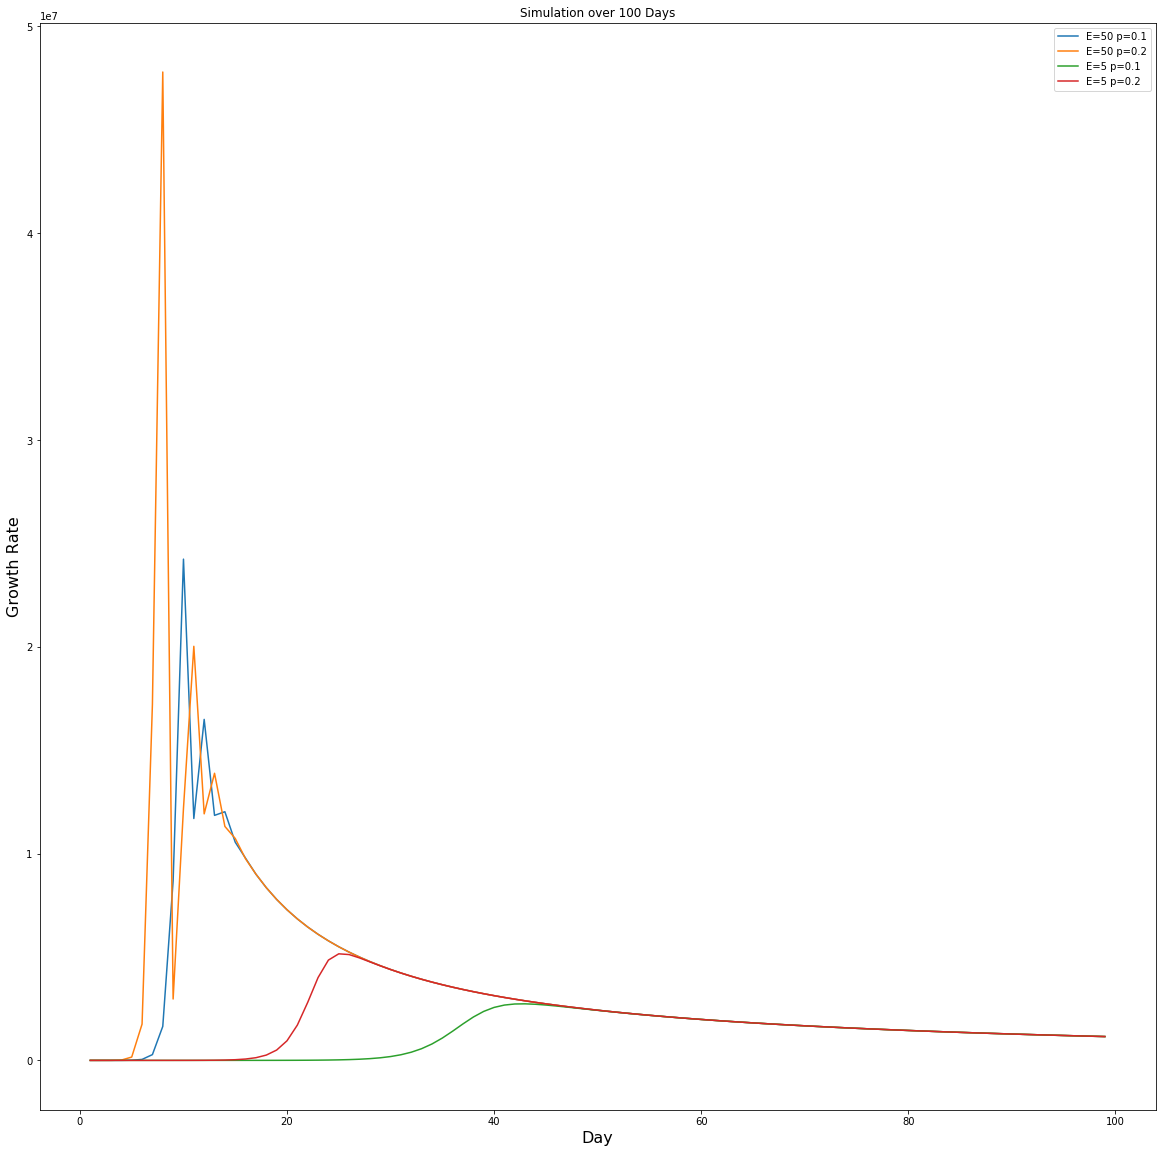

In [107]:
for i in range(0, 2):
    for j in range(0, 2):
        growth_rates = []
        cases = expGrowth(E[i], p[j], N_0, days, Pop)
        for case in range(1, len(cases)):
            growth_rates.append(cases[case] - cases[case-1]) 
        plt.plot(range(1, days), growth_rates, label = "E={} p={}".format(E[i], p[j]))

plt.xlabel("Day", fontsize=16)  
plt.ylabel("Growth Rate", fontsize=16)
plt.title("Simulation over 100 Days")
plt.legend(loc='best')
plt.show()

Ploting cases for australia

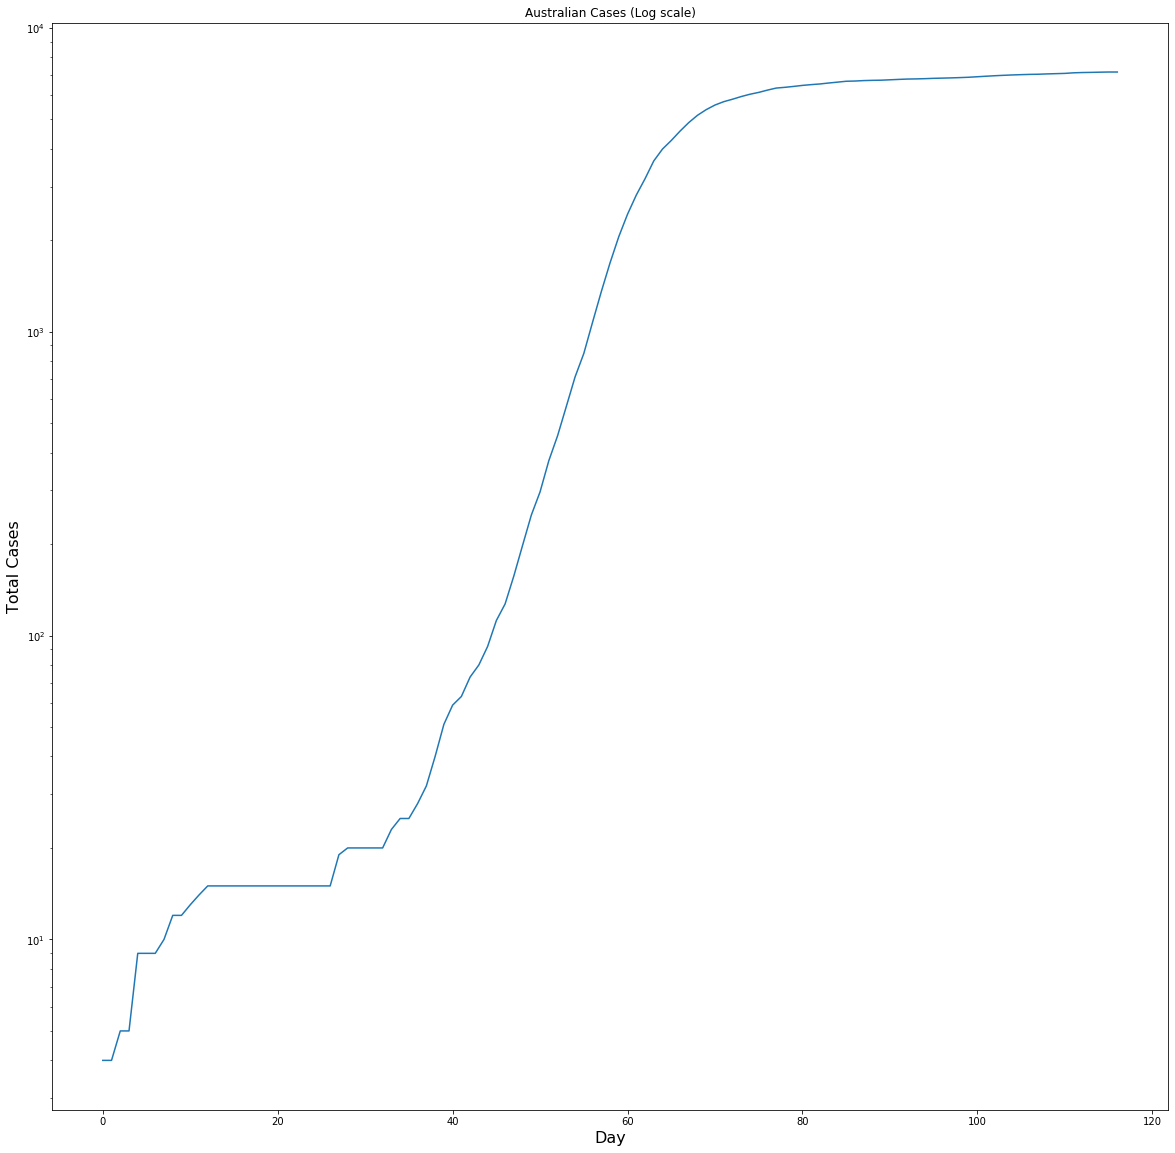

No handles with labels found to put in legend.


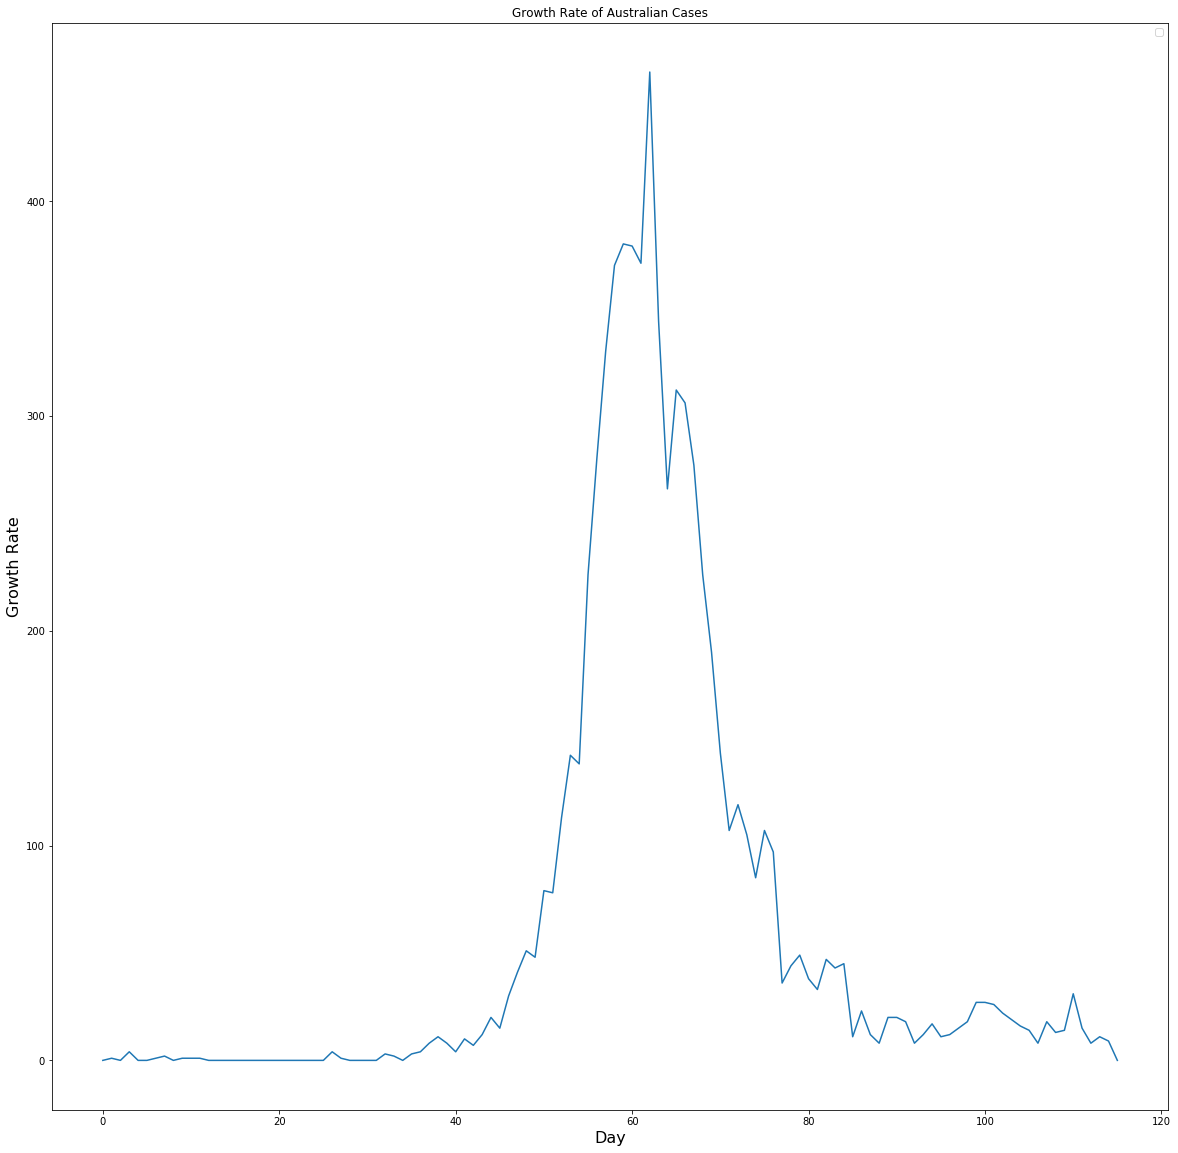

In [111]:
import pandas as pd

df = pd.read_csv("cases_daily_aus.csv")
df["Total Cases"] = df.loc[:]["New cases / day"].cumsum()

growth_rates = []
for i in range(1, len(df["Total Cases"])):
    growth_rates.append(df["Total Cases"][i] - df["Total Cases"][i-1])

plt.plot(range(0, len(df)), df["Total Cases"])
plt.xlabel("Day", fontsize=16)  
plt.ylabel("Total Cases", fontsize=16)
plt.yscale("log")
plt.title("Australian Cases (Log scale)")
plt.show()

plt.plot(range(0, len(growth_rates)), growth_rates)
plt.xlabel("Day", fontsize=16)  
plt.ylabel("Growth Rate", fontsize=16)
plt.title("Growth Rate of Australian Cases")
plt.legend(loc='best')
plt.show()